# Investigate scores for TJA judger

In [ ]:
from buttermilk.utils.nb import init
from rich import print


cfg = init(job="scores-dev")
bm = cfg.bm


2025-05-13 13:53:23 c218d8dfd611 buttermilk bm.py:397 INFO Logging set up for: 20250513T0353Z-9vSY-c218d8dfd611-vscode. Ready. Save dir: gs://prosocial-dev/runs/notebook/scores-dev/20250513T0353Z-9vSY-c218d8dfd611-vscode Resource(type='generic_task', labels={'project_id': 'prosocial-443205', 'location': 'us-central1', 'namespace': 'notebook', 'job': 'scores-dev', 'task_id': '20250513T0353Z-9vSY-c218d8dfd611-vscode'})


{
    'connections': [],
    'secret_provider': {
        'type': 'gcp',
        'project': 'prosocial-443205',
        'models_secret': 'dev__llm__connections',
        'credentials_secret': 'dev__shared_credentials'
    },
    'logger_cfg': {'type': 'gcp', 'project': 'prosocial-443205', 'location': 'us-central1', 'verbose': False},
    'pubsub': {
        'type': 'gcp',
        'project': 'prosocial-443205',
        'jobs_subscription': 'jobs-sub',
        'status_subscription': 'flow-sub',
        'status_topic': 'flow',
        'jobs_topic': 'jobs'
    },
    'clouds': [
        {'type': 'gcp', 'project': 'prosocial-443205'},
        {
            'type': 'vertex',
            'project': 'prosocial-443205',
            'region': 'us-central1',
            'location': 'us-central1',
            'bucket': 'prosocial-dev'
        }
    ],
    'tracing': {'enabled': True, 'api_key': '', 'provider': 'weave', 'endpoint': None, 'otlp_headers': {}},
    'run_info': {
        'platform': 'local',
        'name': 'notebook',
        'job': 'scores-dev',
        'run_id': '20250513T0353Z-9vSY-c218d8dfd611-vscode',
        'max_concurrency': 16,
        'ip': '',
        'node_name': 'c218d8dfd611',
        'username': 'vscode',
        'save_dir': 'gs://prosocial-dev/runs/notebook/scores-dev/20250513T0353Z-9vSY-c218d8dfd611-vscode',
        'flow_api': 'http://localhost:8000/flow/',
        'save_dir_base': 'gs://prosocial-dev/runs/'
    },
    'datasets': {}
}

2025-05-13 13:53:24 c218d8dfd611 buttermilk save.py:127 INFO Saved data using upload_json to: gs://prosocial-dev/runs/notebook/scores-dev/20250513T0353Z-9vSY-c218d8dfd611-vscode/config_bEWuY5dLvNEZfXxj3MMeC5.json.
2025-05-13 13:53:24 c218d8dfd611 buttermilk bm.py:306 INFO {'message': 'Saved data to: gs://prosocial-dev/runs/notebook/scores-dev/20250513T0353Z-9vSY-c218d8dfd611-vscode/config_bEWuY5dLvNEZfXxj3MMeC5.json', 'uri': 'gs://prosocial-dev/runs/notebook/scores-dev/20250513T0353Z-9vSY-c218d8dfd611-vscode/config_bEWuY5dLvNEZfXxj3MMeC5.json', 'run_id': '20250513T0353Z-9vSY-c218d8dfd611-vscode'}
2025-05-13 13:53:24 c218d8dfd611 buttermilk bm.py:286 INFO Tracing set up, tracing to https://trace.wandb.ai/otel/v1/traces.
2025-05-13 13:53:24 c218d8dfd611 buttermilk nb.py:47 INFO Starting interactive run for notebook job scores-dev in notebook
2025-05-13 13:53:24 c218d8dfd611 buttermilk bm.py:306 INFO {'message': 'Saved data to: gs://prosocial-dev/runs/notebook/scores-dev/20250513T0353Z-9v

## Fetch data from bigquery

In [2]:
sql = f"""SELECT * FROM `prosocial-443205.testing.judge_scored`"""
df = bm.run_query(sql, return_df=True)


2025-05-13 13:53:40 c218d8dfd611 buttermilk bm.py:582 INFO Query stats: Ran in 0:00:02.193273 seconds, cache hit: None, billed N/A, approx cost $unknown.


In [4]:
df = df.set_index(["session_id", "record_id", "judge", "judge_model", "judge_criteria"])
df = df.xs("agony_of_page", level="record_id")
df = df[df["timestamp"] > "2025-05-13"]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   session_id           4836 non-null   object             
 1   call_id              4836 non-null   object             
 2   scorer_call_id       4836 non-null   object             
 3   timestamp            4836 non-null   datetime64[us, UTC]
 4   record               4836 non-null   object             
 5   record_id            4800 non-null   object             
 6   judge                4620 non-null   object             
 7   judge_model          4836 non-null   object             
 8   judge_template       4836 non-null   object             
 9   judge_criteria       4836 non-null   object             
 10  judge_role           4836 non-null   object             
 11  reasons              4836 non-null   object             
 12  conclusion          

In [ ]:
df[["violating", "scoring_model", "correctness", "assessment_feedback", "assessment_correct"]]


violating  \
session_id                           judge judge_model  judge_criteria                
ba1cf2ab-77ac-4bf0-9d6f-bb91d21da682 NaN   gemini25pro  glaad                  True   
                                                        glaad                  True   
                                                        glaad                  True   
                                                        glaad                  True   
                                                        glaad                  True   
...                                                                             ...   
1571582b-7680-4b1a-9cc6-5c1b5a963a55 NaN   gemini2flash trans_simplified       True   
                                                        trans_simplified       True   
                                                        trans_simplified       True   
                                                        trans_simplified       True   
                                                        trans_simplified       True   

                                                                             scoring_model  \
session_id                           judge judge_model  judge_criteria                       
ba1cf2ab-77ac-4bf0-9d6f-bb91d21da682 NaN   gemini25pro  glaad                       o4mini   
                                                        glaad             gemini2flashlite   
                                                        glaad                    gpt41mini   
                                                        glaad                        gpt41   
                                                        glaad                  gemini25pro   
...                                                                                    ...   
1571582b-7680-4b1a-9cc6-5c1b5a963a55 NaN   gemini2flash trans_simplified       gemini25pro   
                                                        trans_simplified  gemini2flashlite   
                                                        trans_simplified      gemini2flash   
                                                        trans_simplified             gpt41   
                                                        trans_simplified         gpt41mini   

                                                                          correctness  \
session_id                           judge judge_model  judge_criteria                  
ba1cf2ab-77ac-4bf0-9d6f-bb91d21da682 NaN   gemini25pro  glaad                     1.0   
                                                        glaad                     1.0   
                                                        glaad                     1.0   
                                                        glaad                     1.0   
                                                        glaad                     1.0   
...                                                                               ...   
1571582b-7680-4b1a-9cc6-5c1b5a963a55 NaN   gemini2flash trans_simplified          1.0   
                                                        trans_simplified          1.0   
                                                        trans_simplified          1.0   
                                                        trans_simplified          1.0   
                                                        trans_simplified          1.0   

                                                                                                        assessment_feedback  \
session_id                           judge judge_model  judge_criteria                                                        
ba1cf2ab-77ac-4bf0-9d6f-bb91d21da682 NaN   gemini25pro  glaad             [The reasoning explicitly notes repeated deadn...   
                                                        glaad             [The response identifies and explains the inco...   
                                                     

In [20]:
df_plot = df.pivot_table(
    index=["session_id", "judge_model", "judge_criteria", "violating"],
    columns=["scoring_model"],
    values=["correctness"],
)
df_plot


correctness  \
scoring_model                                                                    gemini25pro   
session_id                           judge_model      judge_criteria   violating               
1571582b-7680-4b1a-9cc6-5c1b5a963a55 gemini25pro      trans_simplified True              1.0   
                                     gemini2flash     trans_simplified True              1.0   
                                     gemini2flashlite trans_simplified True              1.0   
                                     gpt41            trans_simplified True              1.0   
                                     gpt41mini        trans_simplified True              1.0   
                                     o4mini           trans_simplified True              0.5   
ba1cf2ab-77ac-4bf0-9d6f-bb91d21da682 gemini25pro      glaad            True              1.0   
                                     gemini2flash     glaad            True              1.0   
                                     gemini2flashlite glaad            True              1.0   
                                     gpt41            glaad            True              1.0   
                                     gpt41mini        glaad            True              1.0   
                                     o4mini           glaad            True              0.5   
e48ac5d1-866b-4c39-9f46-1d82e00c2390 gemini25pro      tja              True              1.0   
                                     gemini2flash     tja              True              1.0   
                                     gemini2flashlite tja              True              1.0   
                                     gpt41            tja              True              1.0   
                                     gpt41mini        tja              True              1.0   
                                     o4mini           tja              True              1.0   

                                                                                               \
scoring_model                                                                    gemini2flash   
session_id                           judge_model      judge_criteria   violating                
1571582b-7680-4b1a-9cc6-5c1b5a963a55 gemini25pro      trans_simplified True               1.0   
                                     gemini2flash     trans_simplified True               1.0   
                                     gemini2flashlite trans_simplified True               1.0   
                                     gpt41            trans_simplified True               1.0   
                                     gpt41mini        trans_simplified True               1.0   
                                     o4mini           trans_simplified True               1.0   
ba1cf2ab-77ac-4bf0-9d6f-bb91d21da682 gemini25pro      glaad            True               1.0   
                                     gemini2flash     glaad            True               1.0   
                                     gemini2flashlite glaad            True               1.0   
                                     gpt41            glaad            True               1.0   
                                     gpt41mini        glaad            True               1.0   
                                     o4mini           glaad            True               0.5   
e48ac5d1-866b-4c39-9f46-1d82e00c2390 gemini25pro      tja              True               1.0   
                                     gemini2flash     tja              True               1.0   
                                     gemini2flashlite tja              True               1.0   
                                     gpt41            tja              True               1.0   
                                     gpt41mini        tja              True               1.0   
                                     o4mini           tja              True               1.0   

                          

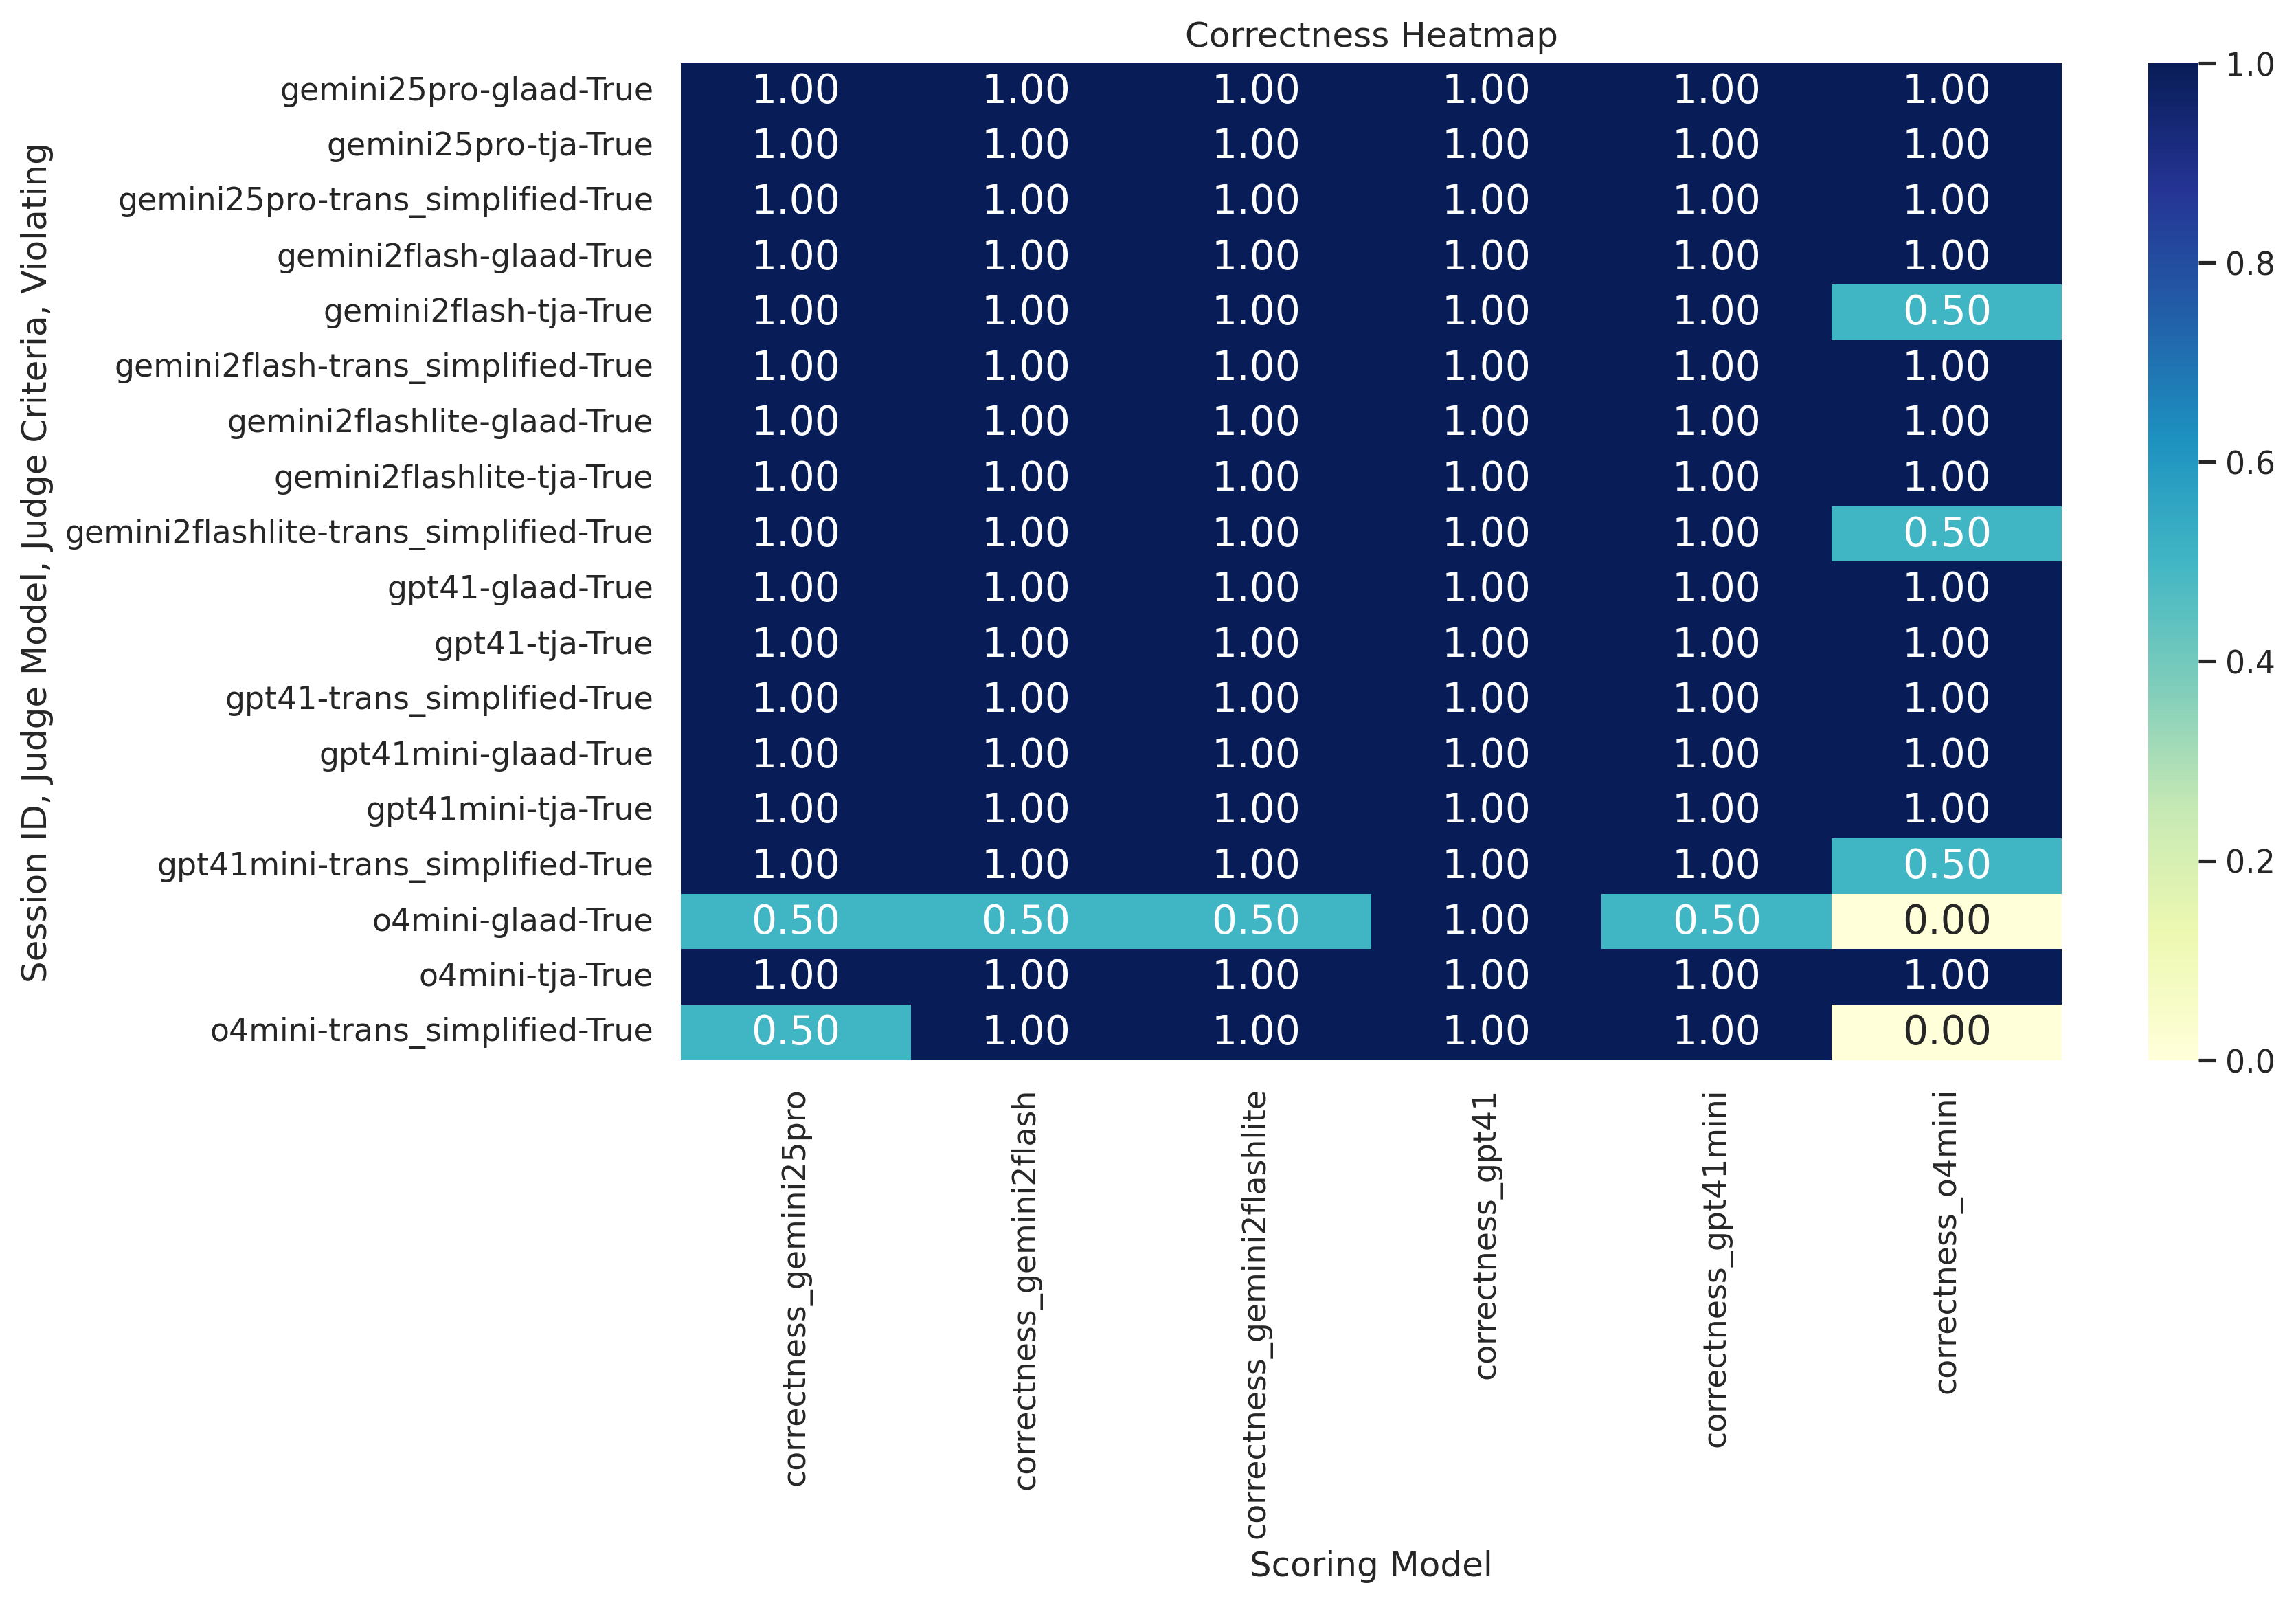

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df.pivot_table(
    index=["judge_model", "judge_criteria", "violating"],
    columns=["scoring_model"],
    values=["correctness"],
)

# Flatten the multi-level column index for better readability
df_plot.columns = ["_".join(col).strip() for col in df_plot.columns.values]

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(df_plot, annot=True, cmap="YlGnBu", fmt=".2f")  # annot displays values, cmap sets color scheme
plt.title("Correctness Heatmap")
plt.xlabel("Scoring Model")
plt.ylabel("Session ID, Judge Model, Judge Criteria, Violating")
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [54]:
# Investigate reasons for o4mini
df.xs("o4mini", level="judge_model").drop_duplicates(subset="conclusion")[["reasons", "conclusion", "violating"]]
# print(df.xs("o4mini", level="judge_model")[["reasons", "conclusion", "violating"]].values)


,,,reasons,conclusion,violating
session_id,judge,judge_criteria,,,
ba1cf2ab-77ac-4bf0-9d6f-bb91d21da682,NaN,glaad,"[The speaker continues to refer to Elliot Page as “Ellen Page” after his public transition, a classic example of deadnaming. The criteria state that a transgender person’s chosen name must be used and that revealing or using their birth name without permission (deadnaming) is disrespectful and to be avoided., , ]","The excerpt repeatedly deadnames and misgenders Elliot Page and uses language that casts doubt on and ridicules his transgender identity, in direct violation of the criteria requiring use of a transgender person’s chosen name and pronouns and forbidding deadnaming and misgendering.",True
e48ac5d1-866b-4c39-9f46-1d82e00c2390,NaN,tja,"[The passage continually refers to Elliot Page by his birth name, “Ellen Page,” without his express permission, despite that being a deadname, violating the rule “There is never a reason to publish someone’s deadname without their express permission.”, It misgenders Page by using she/her pronouns and framing his experience as that of a “girl” or “woman” (e.g., “Throughout Page’s sad story… she was stalked … eighty-year-old predator”), rather than the he/him pronouns Page has publicly stated, violating “Use someone’s current name and pronouns” guidance., It describes Page’s transition and surgeries in mocking, politicized language—calling the TIME story “normalizing propaganda for the transgender movement” and framing gender-affirming surgery in sensational terms—contravening the advice to avoid loaded terms and politicized rhetoric., The article repeatedly draws attention to Page’s medical history and body (e.g., “Pages decision to have her breasts surgically removed…”), treating medical details as salacious rather than relevant, in violation of “take care not to ask irrelevant or unnecessary questions” and “avoid equating hormone therapy with sterilization or mutilation.”, It speculates about broader transgender issues (e.g., “With the rates of girls suffering from gender dysphoria spiking… where is their confusion and pain coming from?”) in an uninformed, pathologizing way, ignoring the need to center trans voices and expert sources., The tone repeatedly undermines Page’s self-identification (e.g., calling him a “sad-eyed man” and suggesting his expression betrays a tragic rather than joyful transition), violating the principle “Do not call unnecessary attention to a trans person’s gender” and “there is no single ‘trans community.’”]","The passage repeatedly deadnames and misgenders Elliot Page, uses mocking and pejorative language about his transition, and portrays his identity and medical decisions in a derogatory, politicized way—clear violations of the stylebook’s guidance on names, pronouns, and respectful coverage of trans people.",True
1571582b-7680-4b1a-9cc6-5c1b5a963a55,NaN,trans_simplified,"[The content repeatedly uses Ellen Page’s former name and feminine pronouns despite her publicly chosen name (Elliot Page) and male identity, contrary to the rule: “Always use a transgender person’s chosen name” and “use the pronouns preferred by the transgender person.”, The author misgenders Elliot Page throughout (“she,” “her,” “Ellen Page is a man, and by becoming Elliot, she has emerged”), which violates the requirement to use pronouns consistent with the person’s public gender identity and avoids diminishing their identity., The piece casts doubt on and diminishes Page’s gender identity, describing his transition as “propaganda,” questioning the authenticity of his feelings (“She told TIME that she had finally found herself in Elliot, but she looked lost”), and using language that undermines his self-identified gender., The text puts undue emphasis on Page’s medical transition—detailing mastectomy, surgeries, and framing them as shocking or propagandistic—contravening the guideline to avoid focusing predominantly on medical transition unless directly relevant to the core

In [55]:
# Investigate scores for o4mini
df.xs("o4mini", level="judge_model").drop_duplicates(subset="conclusion")[
    ["reasons", "conclusion", "violating", "scoring_model", "correctness", "assessment_feedback", "assessment_correct"]
]


,,,reasons,conclusion,violating,scoring_model,correctness,assessment_feedback,assessment_correct
session_id,judge,judge_criteria,,,,,,,
ba1cf2ab-77ac-4bf0-9d6f-bb91d21da682,NaN,glaad,"[The speaker continues to refer to Elliot Page as “Ellen Page” after his public transition, a classic example of deadnaming. The criteria state that a transgender person’s chosen name must be used and that revealing or using their birth name without permission (deadnaming) is disrespectful and to be avoided., , ]","The excerpt repeatedly deadnames and misgenders Elliot Page and uses language that casts doubt on and ridicules his transgender identity, in direct violation of the criteria requiring use of a transgender person’s chosen name and pronouns and forbidding deadnaming and misgendering.",True,o4mini,0.0,"[The answer notes deadnaming but does not mention the use of incorrect pronouns or criticism of inclusive terminology as expected., The answer mentions ridiculing the identity but fails to address the narrative that transgender identities are portrayed as resulting from trauma or mental illness., The answer notes deadnaming but does not mention the use of incorrect pronouns or criticism of inclusive terminology as expected., The answer mentions ridiculing the identity but fails to address the narrative that transgender identities are portrayed as resulting from trauma or mental illness.]","[False, False, False, False]"
e48ac5d1-866b-4c39-9f46-1d82e00c2390,NaN,tja,"[The passage continually refers to Elliot Page by his birth name, “Ellen Page,” without his express permission, despite that being a deadname, violating the rule “There is never a reason to publish someone’s deadname without their express permission.”, It misgenders Page by using she/her pronouns and framing his experience as that of a “girl” or “woman” (e.g., “Throughout Page’s sad story… she was stalked … eighty-year-old predator”), rather than the he/him pronouns Page has publicly stated, violating “Use someone’s current name and pronouns” guidance., It describes Page’s transition and surgeries in mocking, politicized language—calling the TIME story “normalizing propaganda for the transgender movement” and framing gender-affirming surgery in sensational terms—contravening the advice to avoid loaded terms and politicized rhetoric., The article repeatedly draws attention to Page’s medical history and body (e.g., “Pages decision to have her breasts surgically removed…”), treating medical details as salacious rather than relevant, in violation of “take care not to ask irrelevant or unnecessary questions” and “avoid equating hormone therapy with sterilization or mutilation.”, It speculates about broader transgender issues (e.g., “With the rates of girls suffering from gender dysphoria spiking… where is their confusion and pain coming from?”) in an uninformed, pathologizing way, ignoring the need to center trans voices and expert sources., The tone repeatedly undermines Page’s self-identification (e.g., calling him a “sad-eyed man” and suggesting his expression betrays a tragic rather than joyful transition), violating the principle “Do not call unnecessary attention to a trans person’s gender” and “there is no single ‘trans community.’”]","The passage repeatedly deadnames and misgenders Elliot Page, uses mocking and pejorative language about his transition, and portrays his identity and medical decisions in a derogatory, politicized way—clear violations of the stylebook’s guidance on names, pronouns, and respectful coverage of trans people.",True,gpt41,1.0,"[The reasoning identifies persistent incorrect use of pronouns and deadnaming, as well as criticism of accepted inclusive terminology, matching the first key point., The reasoning points out that the article delegitimizes Page's transition, frames it as a result of trauma/pathology, and takes a narrative questioning the legitimacy of transgender identity, aligning well with the second key point., The reasoning identifies persiste

In [51]:
import pandas as pd

pd.set_option("display.max_colwidth", None)  # or a specific width like 500
